# Traffic Sign Recognition Model
## Environment Initialisation

In [ ]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/")
!ls
import os
os.chdir("/content/drive/My Drive/[ Masters ] - Deep Learning Proj/Model")
!pip install import_ipynb

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=f599342acc2dd15750a5dc05514c32a21afcb037c545a5625fbca7bb7a9b11c0
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
# Libraries
import os
import sys
import tensorflow as tf
import numpy as np
import math
IntialiseEnv()
import import_ipynb
import pickle
from sklearn.model_selection import train_test_split

# from Data_Preparation.Data_Preparation import LoadTrainDataSetWithAugmentation
# from Data_Preparation.Data_Preparation import LoadTrainDataSet
# from Data_Preparation.Data_Preparation import LoadTestDataSet

## Reading DataSet
Pre-processing and Loading Train and Test DataSet respectively

In [ ]:
processedTrainDataSetGTSRB = '/content/drive/My Drive/[ Masters ] - Deep Learning Proj/DataSet/Processed_DataSet/GermanTrainDataSet.pkl'
processedTrainDataSetBelgium='/content/drive/My Drive/[ Masters ] - Deep Learning Proj/DataSet/Processed_DataSet/BelgiumTrainDataSet.pkl'
file = open(processedTrainDataSetGTSRB, 'rb')
_, train_image_labels_GTSRB = pickle.load(file)
file.close()
file = open(processedTrainDataSetBelgium, 'rb')
_, train_image_labels_Belgium = pickle.load(file)
file.close()

## Visualization

In [ ]:
from keras import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [16]:
def VisualizeGerman():
  fig, ax = plt.subplots(1, 1)
  # Get a color map
  my_cmap = plt.cm.get_cmap('jet')
  Y,X = np.histogram(train_image_labels_GTSRB, 43, normed=1)
  x_span = X.max()-X.min()
  C = [my_cmap(((x-X.min())/x_span)) for x in X]
  
  # Get normalize function (takes data in range [vmin, vmax] -> [0, 1])

  val_unique_signed,counts_signed=np.unique(train_image_labels_GTSRB,return_counts=True) 
  ax.bar(val_unique_signed, counts_signed, color=C)
  ax.set_xlabel('German Traffic Sign Classes')
  ax.set_ylabel('Frequency per class')
  ax.legend()    
  fig.savefig('/content/drive/My Drive/[ Masters ] - Deep Learning Proj/Model/Visualization/GTSRB-Data-distribution.png', bbox_inches='tight', dpi=300)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
No handles with labels found to put in legend.


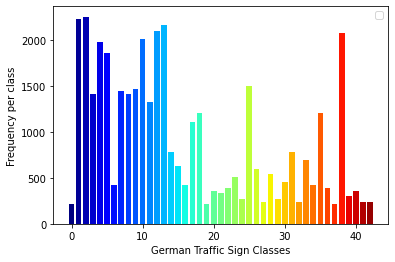

In [17]:
VisualizeGerman()

In [18]:
def VisualizeBelgium():
  fig, ax = plt.subplots(1, 1)
  # Get a color map
  my_cmap = plt.cm.get_cmap('jet')
  Y,X = np.histogram(train_image_labels_Belgium, 66, normed=1)
  x_span = X.max()-X.min()
  C = [my_cmap(((x-X.min())/x_span)) for x in X]
  
  # Get normalize function (takes data in range [vmin, vmax] -> [0, 1])

  val_unique_signed,counts_signed=np.unique(train_image_labels_Belgium,return_counts=True) 
  ax.bar(val_unique_signed, counts_signed, color=C)
  ax.set_xlabel('Belgium Traffic Sign Classes')
  ax.set_ylabel('Frequency per class')
  ax.legend()    
  fig.savefig('/content/drive/My Drive/[ Masters ] - Deep Learning Proj/Model/Visualization/belgium-data-distribution.png', bbox_inches='tight', dpi=300)
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
No handles with labels found to put in legend.


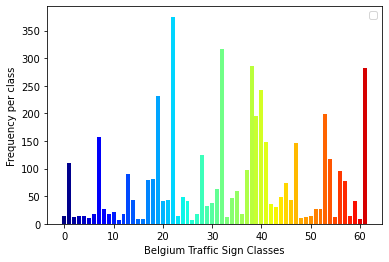

In [20]:
VisualizeBelgium()